In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [102]:
import koreanize_matplotlib

In [83]:
df = pd.read_csv("./data/부산_202203.csv")
df.head(2)

C:\Users\ghdau\AppData\Local\Temp\ipykernel_8204\1385550131.py:1: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./data/부산_202203.csv")


,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,23206623,미광장,NaN,O,숙박,O02,모텔/여관/여인숙,O02A01,모텔/여관/여인숙,I55112,...,2611012600100250001004473,NaN,부산광역시 중구 보수대로44번길 5,600074,48974.0,NaN,NaN,NaN,129.023668,35.100979
1,20418637,BHC치킨,동래점,Q,음식,Q05,닭/오리요리,Q05A08,후라이드/양념치킨,I56193,...,2626010500101850000016529,NaN,부산광역시 동래구 동래로147번길 18,607020,47802.0,NaN,NaN,NaN,129.087156,35.205267


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147799 entries, 0 to 147798
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     147799 non-null  int64  
 1   상호명        147798 non-null  object 
 2   지점명        22032 non-null   object 
 3   상권업종대분류코드  147799 non-null  object 
 4   상권업종대분류명   147799 non-null  object 
 5   상권업종중분류코드  147799 non-null  object 
 6   상권업종중분류명   147799 non-null  object 
 7   상권업종소분류코드  147799 non-null  object 
 8   상권업종소분류명   147799 non-null  object 
 9   표준산업분류코드   138317 non-null  object 
 10  표준산업분류명    138317 non-null  object 
 11  시도코드       147799 non-null  int64  
 12  시도명        147799 non-null  object 
 13  시군구코드      147799 non-null  int64  
 14  시군구명       147799 non-null  object 
 15  행정동코드      147799 non-null  int64  
 16  행정동명       147793 non-null  object 
 17  법정동코드      147799 non-null  int64  
 18  법정동명       147799 non-null  object 
 19  지번코드       147799 non-n

<Axes: >

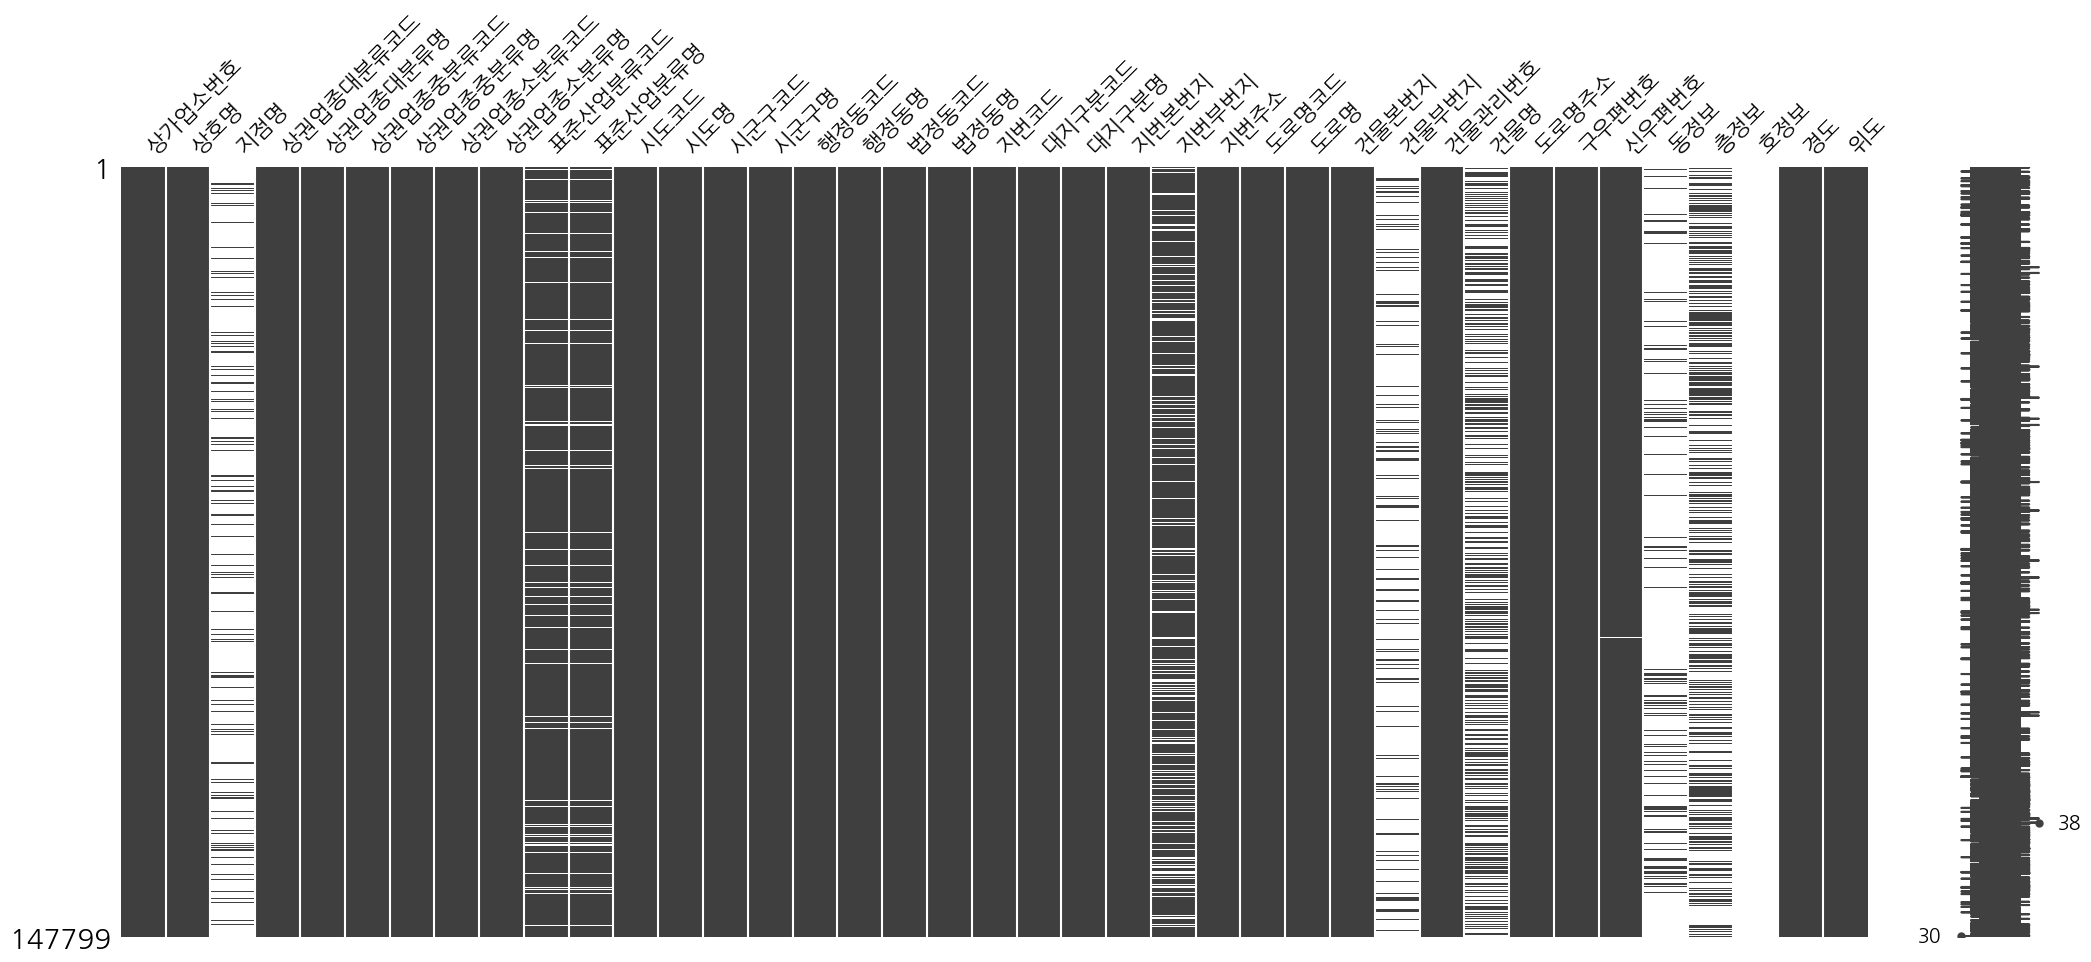

In [86]:
msno.matrix(df)

In [87]:
df.isnull().sum().sort_values(ascending = False)

호정보          147799
동정보          128185
건물부번지        126249
지점명          125767
건물명           86112
층정보           84781
지번부번지         22868
표준산업분류코드       9482
표준산업분류명        9482
신우편번호            13
행정동명              6
상호명               1
지번주소              0
도로명코드             0
도로명               0
상가업소번호            0
건물본번지             0
건물관리번호            0
지번본번지             0
구우편번호             0
경도                0
도로명주소             0
지번코드              0
대지구분명             0
대지구분코드            0
법정동명              0
법정동코드             0
행정동코드             0
시군구명              0
시군구코드             0
시도명               0
시도코드              0
상권업종소분류명          0
상권업종소분류코드         0
상권업종중분류명          0
상권업종중분류코드         0
상권업종대분류명          0
상권업종대분류코드         0
위도                0
dtype: int64

In [88]:
selected_columns = df.columns[~df.columns.str.contains('코드|번호')]
df = df[selected_columns]
df.columns

Index(['상호명', '지점명', '상권업종대분류명', '상권업종중분류명', '상권업종소분류명', '표준산업분류명', '시도명',
       '시군구명', '행정동명', '법정동명', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명',
       '건물본번지', '건물부번지', '건물명', '도로명주소', '동정보', '층정보', '호정보', '경도', '위도'],
      dtype='object')

In [89]:
df.isnull().sum().sort_values(ascending = False)

호정보         147799
동정보         128185
건물부번지       126249
지점명         125767
건물명          86112
층정보          84781
지번부번지        22868
표준산업분류명       9482
행정동명             6
상호명              1
대지구분명            0
지번본번지            0
법정동명             0
지번주소             0
도로명              0
건물본번지            0
시군구명             0
시도명              0
도로명주소            0
상권업종소분류명         0
상권업종중분류명         0
상권업종대분류명         0
경도               0
위도               0
dtype: int64

In [90]:
df.isnull().sum() <= 6

상호명          True
지점명         False
상권업종대분류명     True
상권업종중분류명     True
상권업종소분류명     True
표준산업분류명     False
시도명          True
시군구명         True
행정동명         True
법정동명         True
대지구분명        True
지번본번지        True
지번부번지       False
지번주소         True
도로명          True
건물본번지        True
건물부번지       False
건물명         False
도로명주소        True
동정보         False
층정보         False
호정보         False
경도           True
위도           True
dtype: bool

In [91]:
df = df.loc[:,df.isnull().sum() <= 6]
df.head(2)

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
0,미광장,숙박,모텔/여관/여인숙,모텔/여관/여인숙,부산광역시,중구,부평동,부평동4가,대지,25,부산광역시 중구 부평동4가 25-1,부산광역시 중구 보수대로44번길,5,부산광역시 중구 보수대로44번길 5,129.023668,35.100979
1,BHC치킨,음식,닭/오리요리,후라이드/양념치킨,부산광역시,동래구,복산동,복천동,대지,185,부산광역시 동래구 복천동 185,부산광역시 동래구 동래로147번길,18,부산광역시 동래구 동래로147번길 18,129.087156,35.205267


In [98]:
df['행정동명'].value_counts()

행정동명
부전2동    3646
기장읍     3143
우2동     2926
정관읍     2522
부전1동    2450
        ... 
수정5동      88
봉래2동      82
초장동       55
장전3동      50
금사동       46
Name: count, Length: 208, dtype: int64

In [104]:
df['행정동명'].unique()

array(['부평동', '복산동', '남천2동', '개금1동', '당리동', '좌3동', '만덕2동', '대연1동', '가야2동',
       '우1동', '감전동', '명지1동', '모라1동', '온천1동', '대연3동', '광복동', '사직1동',
       '사직2동', '망미1동', '동삼3동', '충무동', '전포1동', '녹산동', '광안2동', '중앙동',
       '연산6동', '장림1동', '주례1동', '부암3동', '금곡동', '범천1동', '수민동', '좌1동',
       '동삼1동', '부전1동', '연지동', '동삼2동', '개금3동', '안락1동', '덕천2동', '온천3동',
       '기장읍', '부곡4동', '용호3동', '학장동', '다대2동', '문현1동', '대연5동', '화명3동',
       '초읍동', '수영동', '대청동', '다대1동', '청학2동', '가야1동', '범일2동', '반여1동',
       '남천1동', '감천1동', '남산동', '광안1동', '연산9동', '반여2동', '구서1동', '중1동',
       '정관읍', '부곡1동', '초량3동', '우2동', '연산5동', '괴정3동', '서대신4동', '영선1동',
       '장안읍', '재송1동', '금성동', '대저1동', '봉래1동', '괴정1동', '전포2동', '송정동',
       '연산4동', '금사회동동', '초량1동', '장전2동', '선두구동', '용호1동', '영주2동', '연산3동',
       '명지2동', '신평1동', '수정2동', '민락동', '화명2동', '좌4동', '범일5동', '온천2동',
       '부전2동', '반여3동', '주례3동', '당감4동', '동대신3동', '덕천1동', '초량6동', '덕천3동',
       '용호4동', '우암동', '서3동', '하단2동', '거제3동', '암남동', '연산2동', '우3동', '남항동',
       '부곡3동', '반송1동

In [105]:
df['법정동명'].unique()

array(['부평동4가', '복천동', '남천동', '개금동', '당리동', '좌동', '만덕동', '대연동', '가야동',
       '우동', '감전동', '명지동', '모라동', '온천동', '신창동2가', '사직동', '망미동', '동삼동',
       '충무동2가', '전포동', '미음동', '광안동', '중앙동6가', '연산동', '장림동', '주례동', '부암동',
       '금곡동', '범천동', '낙민동', '부전동', '연지동', '안락동', '덕천동', '기장읍', '부곡동',
       '용호동', '학장동', '다대동', '문현동', '화명동', '초읍동', '수영동', '대청동2가', '신창동1가',
       '청학동', '범일동', '반여동', '송정동', '감천동', '남산동', '충무동1가', '구서동', '중동',
       '정관읍', '초량동', '괴정동', '서대신동3가', '창선동1가', '영선동1가', '장안읍', '재송동',
       '금성동', '대저1동', '봉래동3가', '봉래동1가', '신창동4가', '금사동', '영선동2가', '장전동',
       '두구동', '영주동', '녹산동', '신평동', '수정동', '민락동', '좌천동', '당감동', '동대신동3가',
       '우암동', '중앙동4가', '서동', '하단동', '거제동', '암남동', '대평동1가', '오륜동', '반송동',
       '괘법동', '대평동2가', '명장동', '일광면', '남포동6가', '부평동1가', '구포동', '광복동1가',
       '양정동', '남포동2가', '대저2동', '남부민동', '명륜동', '남포동3가', '신호동', '성북동',
       '수안동', '광복동3가', '덕포동', '부평동2가', '감만동', '광복동2가', '엄궁동', '남포동1가',
       '용당동', '부평동3가', '대청동4가', '청룡동', '대교동1가', '부민동1가', '삼락동', '영선동3가

In [99]:
df['법정동명'].value_counts()

법정동명
부전동      5926
우동       5394
연산동      5237
대연동      4627
좌동       3283
         ... 
동선동        29
생곡동        28
오륜동        27
대창동2가      27
눌차동         6
Name: count, Length: 191, dtype: int64

In [106]:
selected_columns = ['상호명','상권업종대분류명','상권업종중분류명','상권업종소분류명',
'시군구명','행정동명','도로명주소','경도','위도']
df = df[selected_columns]
df.head()

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시군구명,행정동명,도로명주소,경도,위도
0,미광장,숙박,모텔/여관/여인숙,모텔/여관/여인숙,중구,부평동,부산광역시 중구 보수대로44번길 5,129.023668,35.100979
1,BHC치킨,음식,닭/오리요리,후라이드/양념치킨,동래구,복산동,부산광역시 동래구 동래로147번길 18,129.087156,35.205267
2,스텔라,소매,의복의류,일반의류,수영구,남천2동,부산광역시 수영구 광안해변로 100,129.115397,35.143770
3,도란도란,음식,한식,한식/백반/한정식,부산진구,개금1동,부산광역시 부산진구 가야대로482번길 29-3,129.024938,35.151645
4,럭키사진관,생활서비스,사진,사진관,사하구,당리동,부산광역시 사하구 낙동대로 395,128.974794,35.102905


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147799 entries, 0 to 147798
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   상호명       147798 non-null  object 
 1   상권업종대분류명  147799 non-null  object 
 2   상권업종중분류명  147799 non-null  object 
 3   상권업종소분류명  147799 non-null  object 
 4   시군구명      147799 non-null  object 
 5   행정동명      147793 non-null  object 
 6   도로명주소     147799 non-null  object 
 7   경도        147799 non-null  float64
 8   위도        147799 non-null  float64
dtypes: float64(2), object(7)
memory usage: 10.1+ MB


In [108]:
df[df['상호명'].isnull()]

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시군구명,행정동명,도로명주소,경도,위도
40106,NaN,소매,가방/신발/액세서리,가방/가죽제품소매,부산진구,부전2동,부산광역시 부산진구 중앙대로 717,129.059161,35.155254


In [109]:
df[df['행정동명'].isnull()]

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시군구명,행정동명,도로명주소,경도,위도
5072,동해냉열냉난방기,소매,철물/난방/건설자재소매,보일러/냉난방용품,금정구,NaN,부산광역시 금정구 중앙대로 1533-1,129.086720,35.221992
13335,바디핏케어휘트니스,스포츠,실내운동시설,헬스클럽,강서구,NaN,부산광역시 강서구 명지국제9로 257,128.920919,35.098288
26301,CU,소매,종합소매점,편의점,금정구,NaN,부산광역시 금정구 식물원로9번길 20,129.085312,35.223473
52805,포토에세이,생활서비스,사진,사진관,금정구,NaN,부산광역시 금정구 장전온천천로 63,129.088868,35.230644
83949,수림횟집,음식,일식/수산물,횟집,강서구,NaN,부산광역시 강서구 해척동서길 137,128.912732,35.107670
88181,희네일,생활서비스,이/미용/건강,발/네일케어,금정구,NaN,부산광역시 금정구 온천장로 137,129.085007,35.222836


In [257]:
df_con = df[df['상권업종소분류명'] == '편의점']
df_con

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시군구명,행정동명,도로명주소,경도,위도
84,GS25정관에이타워점,소매,종합소매점,편의점,기장군,정관읍,부산광역시 기장군 정관읍 정관7로 17-3,129.176985,35.321974
91,포시즌편의점,소매,종합소매점,편의점,북구,화명3동,부산광역시 북구 금곡대로303번길 61,129.010306,35.235660
143,보광훼미리마트민락,소매,종합소매점,편의점,수영구,민락동,부산광역시 수영구 광남로 248,129.125837,35.159222
200,세븐일레븐부산강서명지점,소매,종합소매점,편의점,강서구,명지1동,부산광역시 강서구 명지새동네길1번길 2,128.931019,35.108694
211,코리아세븐부산,소매,종합소매점,편의점,부산진구,개금1동,부산광역시 부산진구 엄광로 62,129.022960,35.147894
...,...,...,...,...,...,...,...,...,...
147539,하프타임,소매,종합소매점,편의점,북구,덕천2동,부산광역시 북구 낙동대로1781번길 1,129.003892,35.209979
147743,GS25,소매,종합소매점,편의점,강서구,녹산동,부산광역시 강서구 미음산단로 129,128.858274,35.136291
147776,CU,소매,종합소매점,편의점,강서구,녹산동,부산광역시 강서구 미음산단로 98,128.855943,35.133802
147784,보광훼미리마트부산화물휴게소점,소매,종합소매점,편의점,남구,감만1동,부산광역시 남구 우암로2번길 18,129.084120,35.111396


In [258]:
df_con['상호명'].value_counts().head(15)

상호명
CU          656
GS25        466
세븐일레븐       372
미니스톱         75
이마트          72
위드미          33
코리아세븐부산      31
씨스페이스        12
하프타임         10
블루25          7
서원탑훼미리마트      6
탑훼미리마트        6
편의점           4
지에스           4
ING25         3
Name: count, dtype: int64

In [259]:
df_con[df_con['상호명'].str.contains('GS25|GS|지에스|gs|gs25')].head()

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시군구명,행정동명,도로명주소,경도,위도
84,GS25정관에이타워점,소매,종합소매점,편의점,기장군,정관읍,부산광역시 기장군 정관읍 정관7로 17-3,129.176985,35.321974
328,GS25해운리베라,소매,종합소매점,편의점,해운대구,중1동,부산광역시 해운대구 구남로29번길 26,129.161980,35.162279
627,GS25,소매,종합소매점,편의점,해운대구,우2동,부산광역시 해운대구 APEC로 55,129.136039,35.169079
817,GS25시,소매,종합소매점,편의점,사하구,장림2동,부산광역시 사하구 을숙도대로 662,128.977848,35.084879
1526,GS정관달산점,소매,종합소매점,편의점,기장군,정관읍,부산광역시 기장군 정관읍 산단7로 8-12,129.203683,35.320143


In [239]:
df_con[df_con['상호명'].str.contains('GS25|GS|지에스|gs|gs25')]['상호명'].unique()

array(['GS25정관에이타워점', 'GS25해운리베라', 'GS25', 'GS25시', 'GS정관달산점',
       'GS25노블리안점', 'GS', 'GS25화명벽산점', '지에스장림우주점', 'GS25대연유엔', 'GS금사대우',
       'GS25수영광서점', '지에스', 'GS편의점동래', 'GS25하단번영', 'GS25영도영선', '지에스25구평등대',
       '지에스25부산범일', '지에스양정플러스점', '지에스25크라운하버', 'GS25구만덕점', 'GS25명장화목',
       '지지에스상사', 'GS25대저프레쉬점', '지에스대연', 'GS25남항점', '지에스25서구한울',
       'GS25다대캐슬점', 'GS25영도한진점', 'GS25영도영선점', 'GS25구포만세점', 'GS25안락충렬점',
       'GS25서면더블루점', 'GS25괘법중앙점/7174', 'GS25정관공단2호점', '우암자유GS25',
       'GS25범천경남점', 'GS25명장삼거리점', 'GS25다대삼거리점', 'GS25괘법공원점',
       'GS25민락수변공원점', 'GS25뉴강서역점', 'GS25금곡뜨란채점', 'GS25만덕대성점', 'GS25달산원룸점',
       'GS25서동중앙', 'GS25부산광안점', 'GS25반여선수촌로점', 'gs25', 'GS25해양대기숙사점',
       'GS25R부경3점', 'GS25베르나움점', 'GS25좌동삼성점', 'GS25R부산연제4점',
       'GS25연산큐브아이점', 'GS25감천한우리점', 'GS25주례원룸점', 'GS25화명맥켄지점',
       'GS25대연베스트점', 'GS25황령힐사이드점', 'GS25연제데시앙점', 'GS25정관더원점',
       'GS25영도오션점', 'GS25정관주민점', 'GS25신호부영', 'GS25서구어시장점', 'GS25영선로터리점',
       'GS25초량일신', 'GS25해운베니키아점', 'GS25괘법덕포점', 'GS

In [260]:
df_con.loc[df_con['상호명'].str.contains('GS25|GS|지에스|gs|gs25'),'상호명'] = 'GS25'
df_con[df_con['상호명'] == 'GS25'].head()      

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시군구명,행정동명,도로명주소,경도,위도
84,GS25,소매,종합소매점,편의점,기장군,정관읍,부산광역시 기장군 정관읍 정관7로 17-3,129.176985,35.321974
328,GS25,소매,종합소매점,편의점,해운대구,중1동,부산광역시 해운대구 구남로29번길 26,129.161980,35.162279
627,GS25,소매,종합소매점,편의점,해운대구,우2동,부산광역시 해운대구 APEC로 55,129.136039,35.169079
817,GS25,소매,종합소매점,편의점,사하구,장림2동,부산광역시 사하구 을숙도대로 662,128.977848,35.084879
1526,GS25,소매,종합소매점,편의점,기장군,정관읍,부산광역시 기장군 정관읍 산단7로 8-12,129.203683,35.320143


In [261]:
df_con['상호명'].value_counts()

상호명
CU                 656
GS25               631
세븐일레븐              372
미니스톱                75
이마트                 72
                  ... 
위드미해운대제일점            1
위드미범일점               1
위드미부산항대교점            1
위드미화명점               1
보광훼미리마트부산화물휴게소점      1
Name: count, Length: 616, dtype: int64

In [262]:
df_con[df_con['상호명'].str.contains('CU|cu|씨유')]['상호명'].unique()

array(['CU', '보드게임CUBE', 'CU덕천현대점', 'CU구서롯데점', '에스제이디앤씨유한책임회사', '지피씨유리',
       'CU금곡주공점', '씨유구서예가', '라텍씨유강서송정점', '씨유서면동문', '씨유구덕꽃마을', 'CU화명하이점',
       'CU정관예림점', 'CU범천대원점', 'CU수안충렬대로점', 'CU부산가락점', 'CU반송중앙점',
       'CU장림삼거리점', 'CU영도해동점', 'CU구포나현점', '씨유락', 'MEGcustom', 'CU만덕쌍용점',
       '씨유신평동매점', 'CU장전삼광점', '씨유양정소망', 'CU덕포고려점', '낫개씨유', '씨유게인',
       'CAFFEPASCUCCI', 'CU엄궁농산물시장점', '굿투씨유', 'CU부산초량제일점', 'CU하단로또일등점',
       'CU재송동국점', '럭스씨유', 'CU범천영광점', 'CU부곡쌍용점', '씨유수영로교회', 'CU서동태광점',
       '예원디앤씨유메점', 'CU정관달산점', 'CU명지원룸점', '씨유신평대로', '씨유기획', '씨유다대푸르지오',
       '부산연제지역자활센터CU', 'CU괘법대원점', 'CU망미블루점', 'CU화명코오롱점', '씨유정관동일2차',
       'CU해운반여점', 'CU대연원룸점', '씨유영도청학조은', 'CU수정진성로', '씨유두산동국', 'CU신라대',
       '씨유당리푸르지오', 'CU장림장평점', '씨유장림무지개', '씨유엑센시티로또', 'CU당리푸르지오', '씨유덕천현대',
       'CU송정블루점', 'CU동의대정문점', 'CU하단가락원룸점', '씨유금강지사', 'CU충무스마일점',
       '엠씨유코팅즈코리아', 'CU광안세종점', 'CU광복동블루점', 'CU부산대금조점', 'CU남산무지개점',
       'CU영도미라주점', 'CU부곡서희점', 'CU대신롯데캐슬점', 'CU화명동원비스타점', 'CU경마공원점',
       'CU하단청구점', 'CU덕천로

In [263]:
not_cu = ['보드게임CUBE','MEGcustom','CAFFEPASCUCCI','에프엠CUSTOM']
df_con.loc[df_con['상호명'].str.contains('CU|cu|씨유'),'상호명'] = 'CU'
df_con[df_con['상호명'] == 'CU'].head()

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시군구명,행정동명,도로명주소,경도,위도
350,CU,소매,종합소매점,편의점,연제구,연산5동,부산광역시 연제구 중앙대로 999,129.074512,35.179123
780,CU,소매,종합소매점,편의점,부산진구,양정1동,부산광역시 부산진구 양지로5번길 19,129.070019,35.170527
994,CU,소매,종합소매점,편의점,남구,용호4동,부산광역시 남구 용호로 254,129.111499,35.109706
1325,CU,소매,종합소매점,편의점,수영구,망미2동,부산광역시 수영구 수미로41번길 3,129.115234,35.173707
1549,CU,소매,종합소매점,편의점,북구,금곡동,부산광역시 북구 금곡대로616번길 57,129.016023,35.263285


In [264]:
df_con['상호명'].value_counts()

상호명
CU                 788
GS25               631
세븐일레븐              372
미니스톱                75
이마트                 72
                  ... 
코리아세븐부산온천중앙점         1
코리아세븐부산해운대엘리움점       1
보광훼미리마트해운대경남         1
해성편의점                1
보광훼미리마트부산화물휴게소점      1
Name: count, Length: 486, dtype: int64

In [268]:
df_con['상호명'].value_counts().head(2)

상호명
CU      788
GS25    631
Name: count, dtype: int64

In [269]:
columns = df_con['상호명'].value_counts().head(2).index
columns

Index(['CU', 'GS25'], dtype='object', name='상호명')

In [270]:
df_con = df_con.loc[df_con['상호명'].isin(columns),:]
df_con['상호명'].value_counts()

상호명
CU      788
GS25    631
Name: count, dtype: int64

In [271]:
df_con.describe(include='O')

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시군구명,행정동명,도로명주소
count,1419,1419,1419,1419,1419,1418,1419
unique,2,1,1,1,16,196,1330
top,CU,소매,종합소매점,편의점,부산진구,녹산동,부산광역시 남구 오륙도로 85
freq,788,1419,1419,1419,155,45,4


<Axes: xlabel='상호명', ylabel='count'>

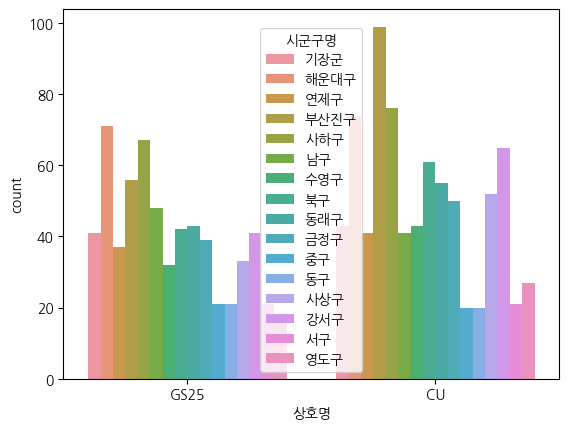

In [272]:
sns.countplot(x='상호명',data=df_con, hue='시군구명')

<Axes: xlabel='시군구명', ylabel='count'>

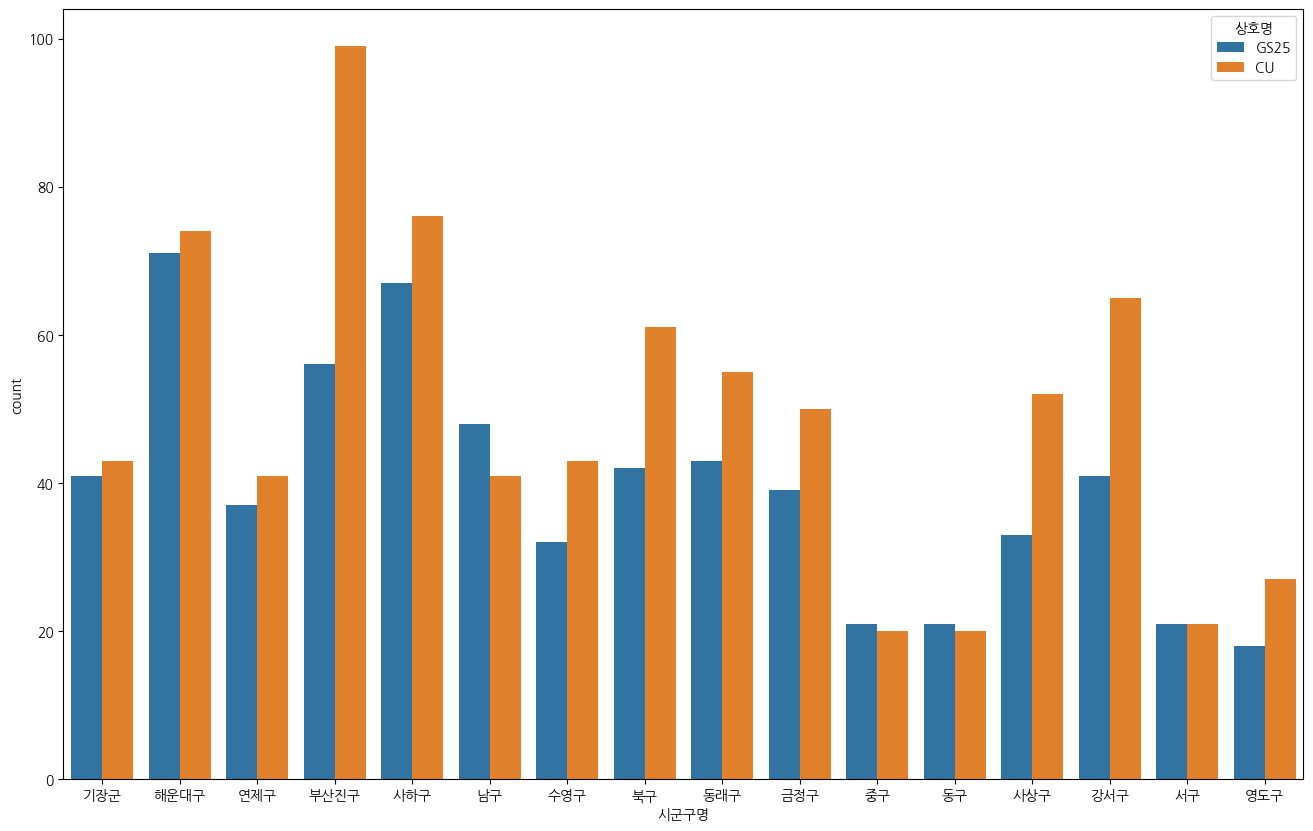

In [274]:
plt.figure(figsize=[16,10])
sns.countplot(x='시군구명',data=df_con, hue='상호명')

<Axes: xlabel='경도', ylabel='위도'>

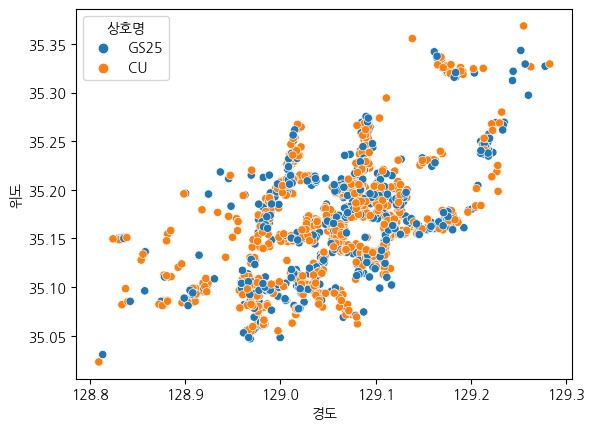

In [286]:
sns.scatterplot(data=df_con, x='경도', y='위도', hue='상호명')

In [249]:
df_con

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시군구명,행정동명,도로명주소,경도,위도
84,GS25,소매,종합소매점,편의점,기장군,정관읍,부산광역시 기장군 정관읍 정관7로 17-3,129.176985,35.321974
328,GS25,소매,종합소매점,편의점,해운대구,중1동,부산광역시 해운대구 구남로29번길 26,129.161980,35.162279
350,CU,소매,종합소매점,편의점,연제구,연산5동,부산광역시 연제구 중앙대로 999,129.074512,35.179123
627,GS25,소매,종합소매점,편의점,해운대구,우2동,부산광역시 해운대구 APEC로 55,129.136039,35.169079
780,CU,소매,종합소매점,편의점,부산진구,양정1동,부산광역시 부산진구 양지로5번길 19,129.070019,35.170527
...,...,...,...,...,...,...,...,...,...
147523,CU,소매,종합소매점,편의점,연제구,연산5동,부산광역시 연제구 거제천로154번길 41,129.079341,35.186471
147536,CU,소매,종합소매점,편의점,강서구,녹산동,부산광역시 강서구 화전산단4로25번길 15,128.880767,35.111647
147743,GS25,소매,종합소매점,편의점,강서구,녹산동,부산광역시 강서구 미음산단로 129,128.858274,35.136291
147776,CU,소매,종합소매점,편의점,강서구,녹산동,부산광역시 강서구 미음산단로 98,128.855943,35.133802


In [250]:
df_con['상호명'].groupby(df_con['시군구명']).count()

시군구명
강서구     106
금정구      89
기장군      84
남구       89
동구       41
동래구      98
부산진구    155
북구      103
사상구      85
사하구     143
서구       42
수영구      75
연제구      78
영도구      45
중구       41
해운대구    145
Name: 상호명, dtype: int64

In [251]:
df_con['상호명'].groupby(df_con['시군구명']).count().sort_values(ascending=False)

시군구명
부산진구    155
해운대구    145
사하구     143
강서구     106
북구      103
동래구      98
금정구      89
남구       89
사상구      85
기장군      84
연제구      78
수영구      75
영도구      45
서구       42
동구       41
중구       41
Name: 상호명, dtype: int64

In [252]:
lat = df_con[df_con['시군구명'] == '부산진구']['위도'].mean()
long = df_con[df_con['시군구명'] == '부산진구']['경도'].mean()
print(lat , long)

35.16056353309785 129.05134156135057


In [206]:
import folium

In [319]:
geo_path = './data/busan.json'
import json
geo_json = json.load(open(geo_path, encoding='utf-8'))

In [289]:
myMap = folium.Map(location=[lat,long],zoom_start = 13)

for i in df_con.index:
  sub_lat = df_con.loc[i,"위도"]
  sub_long = df_con.loc[i,"경도"]
  title = f'{df_con.loc[i,"상호명"]} - {df_con.loc[i,"도로명주소"]}'
  color = 'green'
  if df_con.loc[i,'상호명'] == 'CU':
      color = 'blue'
  elif df_con.loc[i,'상호명'] == 'GS25':
      color = 'red'
  else:
      color = 'yellow'

  folium.CircleMarker([sub_lat,sub_long],
                      radius = 3,
                      color = color ,
                      tooltip= title).add_to(myMap)
myMap

In [312]:
df_con_vs = df_con.groupby(["시군구명",'상호명'])['도로명주소'].count()
df_con_vs = df_con_vs.reset_index()
df_con_vs = df_con_vs.rename(columns={"시군구명" : "구" , "상호명":"브랜드명","도로명주소":"매장수"})
df_con_vs

,구,브랜드명,매장수
0,강서구,CU,65
1,강서구,GS25,41
2,금정구,CU,50
3,금정구,GS25,39
4,기장군,CU,43
5,기장군,GS25,41
6,남구,CU,41
7,남구,GS25,48
8,동구,CU,20
9,동구,GS25,21


In [314]:
df_cu = df_con_vs[df_con_vs['브랜드명'] == 'CU'].copy()
df_cu

,구,브랜드명,매장수
0,강서구,CU,65
2,금정구,CU,50
4,기장군,CU,43
6,남구,CU,41
8,동구,CU,20
10,동래구,CU,55
12,부산진구,CU,99
14,북구,CU,61
16,사상구,CU,52
18,사하구,CU,76


In [324]:
df_gs = df_con_vs[df_con_vs['브랜드명'] == 'GS25'].copy()

In [315]:
df_cu.to_csv("CU.csv" , index = False)

In [316]:
pd.read_csv('CU.csv')

,구,브랜드명,매장수
0,강서구,CU,65
1,금정구,CU,50
2,기장군,CU,43
3,남구,CU,41
4,동구,CU,20
5,동래구,CU,55
6,부산진구,CU,99
7,북구,CU,61
8,사상구,CU,52
9,사하구,CU,76


In [328]:
m = folium.Map([lat,long], zoom_start = 14)

folium.Choropleth(
    geo_data = df_cu.to_crs(),
    name='chorpleth',
    data=df_cu,
    columns =['구','매장수'],
    key_on = 'feature.properties.name',
    fill_color='RdPu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='CU 매장수'
).add_to(m)
m